<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 70px">

# Client Project: Estimating Neighborhood Affluence with Yelp

<i>
                
                Submitted by Shannon Bingham and Roy Kim
</i>

 
## Problem Statement
The goal of the project is to estimate the affluence of a neighborhood based on the number of `$` of businesses and services (according to Yelp) in a given neighborhood (`$`, `$$`, `$$$`, `$$$$`). The project takes a list of zip codes as input and estimates the wealth of the locality. While traditional methods typically estimate wealth of a locality based on demographic characteristics (e.g. income or unemployment rate), the novelty of this approach is in its use of big data related to commercial activity and cost of product and services as an indicator for affluency. 

## Notebook Description
This notebook contains python code that is used to create: 
- a local file containing a subset of IRS average adjusted gross income (agi).

## Data

#### Data Source
| File Name | Description | Source |
| :------------ | :------------ | :------------ |
| 16zpallnoagi.csv |2016 Individual Income Tax ZIP Code Data |  [www.IRS.gov](https://www.irs.gov/statistics/soi-tax-stats-individual-income-tax-statistics-2016-zip-code-data-soi) (includes data and full data dictionary)| 

#### Data Dictionary
| Input | Description | File Name |
| :------------ | :------------ | :------------ |
| Data used in this notebook: |  
| ZIPCODE | 5-digit Zip code | 16pallagi.csv |
| N1 | Total number of tax returns | 16pallagi.csv |
| A00100 |	Adjust gross income (AGI) | 16pallagi.csv | 


| Output | Description | File Name |
| :------------ | :-------------- | :-------------- |
| zipcode | 5-digit Zip code | irs_agi.csv |
| average_agi | Average adjusted gross income| irs_agi.csv |
| n_returns | Total number of tax returns | irs_agi.csv |

## Set up environment.

In [1]:
# Import libraries.
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import seaborn as sns

# Increase number of columns that can be viewed in notebook.
pd.set_option('display.max_columns', 500)

# Set random seed.
random.seed(42)

## Read in zip code data.

In [2]:
# Locate the file.
agi_data_csv = './data/16zpallnoagi.csv'

# Load the data.
df = pd.read_csv(agi_data_csv,dtype={'ZIPCODE': 'str'})

# Take a look. 
df.head()

,STATEFIPS,STATE,ZIPCODE,AGI_STUB,N1,MARS1,MARS2,MARS4,PREP,N2,NUMDEP,TOTAL_VITA,VITA,TCE,VITA_EIC,RAL,RAC,ELDERLY,A00100,N02650,A02650,N00200,A00200,N00300,A00300,N00600,A00600,N00650,A00650,N00700,A00700,N00900,A00900,N01000,A01000,N01400,A01400,N01700,A01700,SCHF,N02300,A02300,N02500,A02500,N26270,A26270,N02900,A02900,N03220,A03220,N03300,A03300,N03270,A03270,N03150,A03150,N03210,A03210,N03230,A03230,N03240,A03240,N04470,A04470,A00101,N17000,A17000,N18425,A18425,N18450,A18450,N18500,A18500,N18800,A18800,N18300,A18300,N19300,A19300,N19500,A19500,N19530,A19530,N19550,A19550,N19570,A19570,N19700,A19700,N20800,A20800,N21020,A21020,N04800,A04800,N05800,A05800,N09600,A09600,N05780,A05780,N07100,A07100,N07300,A07300,N07180,A07180,N07230,A07230,N07240,A07240,N07220,A07220,N07260,A07260,N09400,A09400,N85770,A85770,N85775,A85775,N09750,A09750,N10600,A10600,N59660,A59660,N59720,A59720,N11070,A11070,N10960,A10960,N11560,A11560,N06500,A06500,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
0,1,AL,0,0,2016530,825680,748830,402320,1140180,4065690,1417040,39400,26030,13370,5720,43470,415860,475120,114357010,2016520,115806207,1692780,80874192,487730,661987,257950,1593792,236710,1271278,313420,342665,338060,3134618,216140,2962720,170960,2736118,419940,10175468,40500,51580,157296,296270,4006534,86880,6647832,462910,1449197,45330,11592,4560,113441,39640,290341,23040,103108,131190,138468,14920,37316,2810,81746,537420,12191895,63516782,142990,1148408,429850,2252158,88420,131633,428760,644476,374380,128381,534530,3213652,385860,2723972,6530,24320,16820,8445,64060,81553,9840,57916,468310,3432168,165450,1289250,10670,120346,1499090,75791128,1501200,14043581,19330,86580,40870,29281,622430,703707,58480,24509,95570,51892,132070,141515,128970,23543,327480,381927,37030,19256,245600,626014,81900,336437,90780,368101,44910,30279,1937650,17621081,502290,1388980,449420,1226972,342120,449260,142860,132627,33650,18934,1318500,13326028,1458270,14219765,23560,40254,28280,89091,358370,1683323,1583690,4690385
1,1,AL,35004,0,5210,2150,2140,830,2470,10510,3430,40,40,0,0,60,1050,1090,287603,5210,290260,4550,234833,1160,947,530,1052,470,792,1100,835,770,6294,380,1628,420,6338,990,19766,0,110,332,680,8444,160,5138,1300,2657,120,30,0,0,90,483,80,264,590,603,50,112,0,0,1710,31640,145055,410,2954,1470,5590,180,243,1410,1042,1230,306,1700,7277,1380,8524,0,0,40,18,420,529,0,0,1470,7777,510,3411,20,81,4280,187073,4290,29498,0,0,120,75,1840,2377,80,7,410,245,360,422,370,65,1160,1479,110,48,530,1190,200,741,230,817,100,59,5030,37343,900,2183,770,1899,640,820,320,278,90,51,3870,27082,4140,28671,0,0,30,20,930,3022,4130,11001
2,1,AL,35005,0,3100,1340,890,830,1740,6020,2170,50,50,0,0,60,920,710,120798,3100,121690,2660,98565,490,294,190,249,160,186,500,332,480,268,120,67,270,3128,660,11912,0,110,367,460,4358,30,187,560,892,60,14,0,0,0,0,30,85,210,226,30,71,0,0,790,13535,48951,290,1723,600,1703,130,151,590,482,550,200,790,2726,590,2796,0,0,0,0,160,176,0,0,750,3842,330,1910,0,0,2310,67341,2320,9649,0,0,70,43,1000,1066,0,0,180,102,230,268,280,51,530,543,90,60,250,368,120,423,130,473,80,47,3010,15879,890,2402,800,2167,580,752,280,266,40,25,1970,8580,2180,9262,0,0,0,0,430,860,2600,7364
3,1,AL,35006,0,1200,430,600,170,790,2560,820,0,0,0,0,30,240,310,57114,1200,57418,1040,43707,240,104,80,108,70,66,150,115,160,912,50,-4,100,1709,320,6834,0,70,209,230,2638,0,0,190,304,0,0,0,0,0,0,0,0,50,45,0,0,0,0,240,4271,19566,80,514,180,752,40,47,190,175,200,76,240,1090,180,874,0,0,0,0,30,27,0,0,210,1090,80,465,0,0,920,34951,920,5154,0,0,0,0,360,441,0,0,0,0,70,74,80,14,240,307,20,4,100,172,50,198,50,206,30,18,1170,7592,270,650,220,560,170,208,70,62,20,8,860,4712,910,4982,0,0,0,0,180,315,1010,2873
4,1,AL,35007,0,11940,4770,5140,1750,5450,24950,8840,170,60,100,0,70,1840,2460,689574,11940,697882,10180,545418,2660,1686,1550,3642,1400,2659,2640,2194,2260,21280,1160,4802,1100,19065,2180,46403,30,240,671,1610,22746,490,22433,3440,8308,340,83,0,0,280,1793,190,687,1260,1346,130,378,30,246,40

## Clean the data.

In [4]:
# Drop state-level observations (zipcode = zeroes).
df = df[df.ZIPCODE != '0']
df = df[df.ZIPCODE != '00000']

# Verify drop.
df.shape

(29923, 3)

In [5]:
# Drop zipcodes categorized as "other" (zipcode = '99999').
df = df[df.ZIPCODE != '99999']

# Verify drop.
df.shape

(29872, 3)

In [6]:
# Reset index.
df.reset_index(drop=True, inplace=True)

# Verify update.
df.head()

,ZIPCODE,A00100,N1
0,35004,287603,5210
1,35005,120798,3100
2,35006,57114,1200
3,35007,689574,11940
4,35010,380037,7910


In [7]:
# Find out how many zip codes need to be right justified.
sum(df.ZIPCODE.str.len() < 5)

2324

In [8]:
# Add leading zeroes to ZIPCODE.
df['ZIPCODE'] = df.ZIPCODE.str.pad(5, side='left', fillchar='0')

# Verify update.
sum(df.ZIPCODE.str.len() < 5)

0

In [9]:
# Confirm that there are no duplicates.
print(f'Shape is {df.shape}')
print(f'Number of unique records is {len(df["ZIPCODE"].unique())}')

Shape is (29872, 3)
Number of unique records is 29872


## Create summary data per zip code.

In [10]:
# Calculate average agi.
df['average_agi'] = round(((df['A00100'] / df['N1']) * 1000),2).astype(int)

# Verify new column.
df.head()

,ZIPCODE,A00100,N1,average_agi
0,35004,287603,5210,55202
1,35005,120798,3100,38967
2,35006,57114,1200,47595
3,35007,689574,11940,57753
4,35010,380037,7910,48045


In [11]:
# Drop unneeded columns and reorder the remaining columns.
cols = ['ZIPCODE', 'average_agi', 'N1']

# Save data.
df = df[cols]

# Verify update.
df.head()

,ZIPCODE,average_agi,N1
0,35004,55202,5210
1,35005,38967,3100
2,35006,47595,1200
3,35007,57753,11940
4,35010,48045,7910


In [12]:
# Rename columns.
new_cols_dict = {
        'ZIPCODE'    :'zipcode',
        'average_agi':'average_agi',
        'N1'         :'n_returns',
    }

df.rename(columns=new_cols_dict, inplace=True)

# Verify rename.
df.head()

,zipcode,average_agi,n_returns
0,35004,55202,5210
1,35005,38967,3100
2,35006,47595,1200
3,35007,57753,11940
4,35010,48045,7910


## Exporatory Data Analysis of Average AGI.


In [13]:
# Get descriptive statistics for the average_agi.
df['average_agi'].describe()

count    2.987200e+04
mean     6.105513e+04
std      4.657623e+04
min      6.328000e+03
25%      4.272100e+04
50%      5.079150e+04
75%      6.374125e+04
max      2.212450e+06
Name: average_agi, dtype: float64

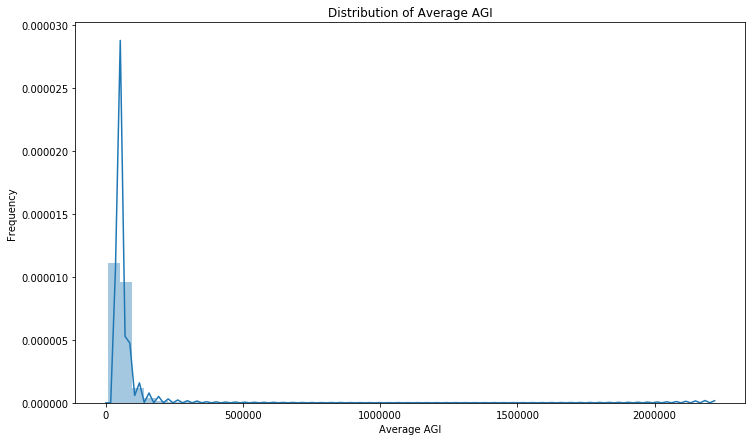

In [14]:
# Look at the distribution of average_agi.

# Set figure size.
plt.figure(figsize=(12,7))

# Set data.
x = pd.Series(df['average_agi'], name="Average AGI")
sns.distplot(x)

# Set labels and title.
plt.ylabel("Frequency")
plt.title("Distribution of Average AGI");

# Save figure.
plt.savefig('./images/01_Data-Collection-AGI-distplot', 
            bbox_inches='tight')

In [15]:
# Take a closer look at the distribution of the values of average_agi in the 4th quartile.

# Create dataframe.
df_q4 = pd.DataFrame()
df_q4 = df[df['average_agi'] >= 63741]

# Get descriptive statistics.
df_q4['average_agi'].describe()

count    7.468000e+03
mean     1.045924e+05
std      7.689704e+04
min      6.374800e+04
25%      7.048900e+04
50%      8.182400e+04
75%      1.067782e+05
max      2.212450e+06
Name: average_agi, dtype: float64

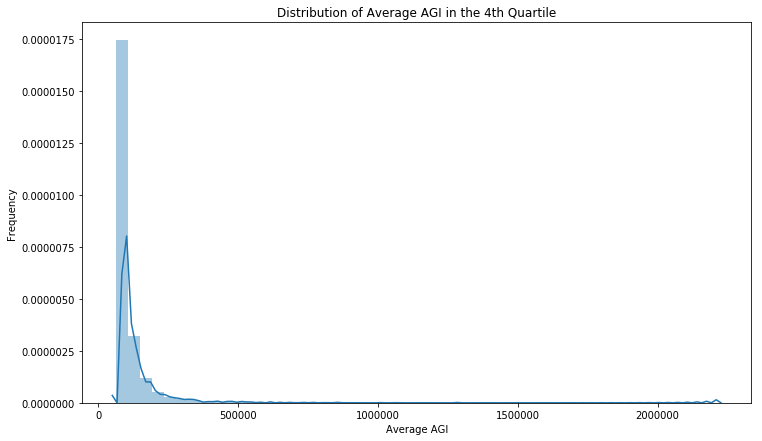

In [16]:
# Look at the distribtion of average_agi within the 4th (highest) quartile. 

# Set figure size.
plt.figure(figsize=(12,7))

# Set data.
x = pd.Series(df_q4['average_agi'], name="Average AGI")
sns.distplot(x)

# Set labels and title.
plt.ylabel("Frequency")
plt.title("Distribution of Average AGI in the 4th Quartile")

# Save figure.
plt.savefig('./images/01_Data-Collection-AGI-distplot-q4', 
            bbox_inches='tight');

## Save file.

In [17]:
# Set file locations.
irs_agi_csv = (f'./data/irs_agi.csv')

# Save.
df.to_csv(irs_agi_csv, encoding='utf-8', index=False,
          columns=['zipcode', 'average_agi', 'n_returns'])